# Calibrating a Camera

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

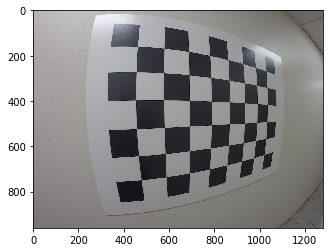

In [2]:
# Read in a calibration image
img = mpimg.imread('./calibration_wide/GOPR0032.jpg')
plt.imshow(img)

Just the known object coordinates of the chessboard corners for an eight by six board. These points will be 3D coordinates, x, y and z from the top left corner,0, 0, 0, to the bottom right, 7, 5, 0. The z coordinate will be zero for every point, since the board is on a flat image plane. And x and y will be all the coordinate of the corners.
![8by6_board.png](./img/8by6_board.png)

So I'll prepare these object points, first by creating six by eight points in an array.

In [3]:
# Arrays to store object points and image points from all the images

objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

Each with three columns for the x, y, and z coordinates of each corner. I'll initialize these all as zeros using Numpy's zero function.

In [4]:
# Prepare object points, like (0,0,0),(2,0,0),...,(7,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2) # x, y coordinates

The z coorindate will stay zero so I'll leave that as it is but for our furst two columns, x and y I'll use Numpy's `mgrid` function to generate the coordinates that I want.
`mgrid` returns the coordinate values for a given grid size.
I'll sahpe those coorindates back into two columns, one for x and one for y.

Next, to create the image points, I want to look at the distorted calibration image and detect the corners of the board.
OpenCV gives us an easy way to detect chessboard corners with a funtion called [`findChessboardCorners`](https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#bool%20findChessboardCorners(InputArray%20image,%20Size%20patternSize,%20OutputArray%20corners,%20int%20flags) that returns the corners found in a grayscale image.

In [5]:
# Convert image to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

So, I'll convert this image to grayscale and then I'll pass that into the `findChessboardCorners` function.
This takes in our greyscale image along with the dimensions of the chessboard corners.
In this case, eight by six, and the last parameter is for any flags and there are none in this example.

In [6]:
# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

If this function detects corners, I'll append those points to the image points array. I'll also add prepared object points, `objp` to the object points array. And these object points will be the same for all of the calibration images, since they represent a real chessboard.

Next, I'll also draw the detected corners, with a call to [`drawChessboardCorners`](https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#drawchessboardcorners) ,that takes in our image, corner dimensions and corner points. And I'll display these corners so that we can see what was detected in an interactive window. 

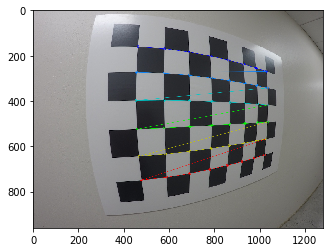

In [7]:
# If corners are found, add object points, image points
if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)
    
    # draw and display the corners
    img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
    plt.imshow(img)